# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 606


array([ 128.42114766,   55.31888458,   74.36658126, ..., -111.55454216,
         38.47350099,  -66.5517074 ])

---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [9]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = query_url + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | tiksi
Processing Record 2 of Set 1 | krasnokholmskiy
Processing Record 3 of Set 1 | port-aux-francais
Processing Record 4 of Set 1 | vorgashor
Processing Record 5 of Set 1 | talnakh
Processing Record 6 of Set 1 | waingapu
Processing Record 7 of Set 1 | fangshan
Processing Record 8 of Set 1 | puerto ayora
Processing Record 9 of Set 1 | wailua homesteads
Processing Record 10 of Set 1 | tomatlan
Processing Record 11 of Set 1 | fort bragg
Processing Record 12 of Set 1 | farah
Processing Record 13 of Set 1 | whitehorse
Processing Record 14 of Set 1 | badger
Processing Record 15 of Set 1 | la passe
Processing Record 16 of Set 1 | bafoulabe
Processing Record 17 of Set 1 | kangding
Processing Record 18 of Set 1 | port mathurin
Processing Record 19 of Set 1 | hithadhoo
Processing Record 20 of Set 1 | port elizabeth
Processing Record 21 of Set 1 | yellowknife
Processing Record 22 of Set 1 | tindouf
Process

In [10]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame.from_records(city_data)

# Show Record Count
city_data_df.count()


City          581
Lat           581
Lng           581
Max Temp      581
Humidity      581
Cloudiness    581
Wind Speed    581
Country       581
Date          581
dtype: int64

In [11]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,tiksi,71.6872,128.8694,12.92,55,85,6.49,RU,1689583645
1,krasnokholmskiy,55.9873,55.0466,22.47,63,99,4.20,RU,1689583646
2,port-aux-francais,-49.3500,70.2167,1.55,95,100,15.10,TF,1689583646
3,vorgashor,67.5833,63.9500,16.57,81,100,6.07,RU,1689583646
4,talnakh,69.4865,88.3972,10.67,86,100,5.00,RU,1689583646


In [133]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [134]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,tiksi,71.6872,128.8694,12.92,55,85,6.49,RU,1689583645
1,krasnokholmskiy,55.9873,55.0466,22.47,63,99,4.20,RU,1689583646
2,port-aux-francais,-49.3500,70.2167,1.55,95,100,15.10,TF,1689583646
3,vorgashor,67.5833,63.9500,16.57,81,100,6.07,RU,1689583646
4,talnakh,69.4865,88.3972,10.67,86,100,5.00,RU,1689583646


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

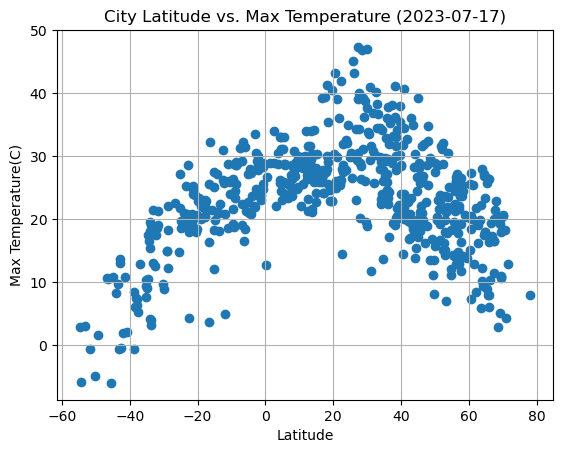

In [25]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'])

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Max Temperature(C)')
plt.title('City Latitude vs. Max Temperature ({})'.format(time.strftime('%Y-%m-%d')))
plt.grid(True)
# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

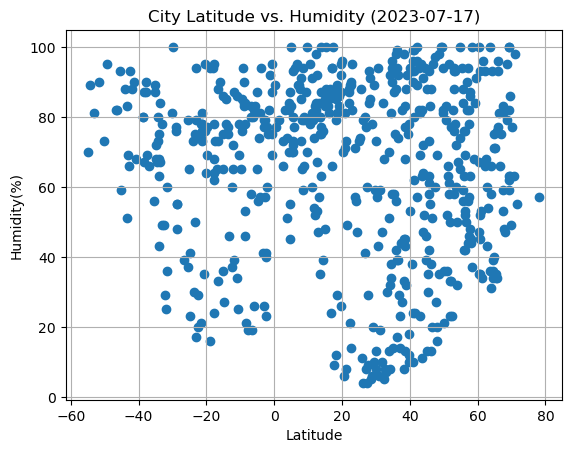

In [26]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'])

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Humidity(%)')
plt.title('City Latitude vs. Humidity ({})'.format(time.strftime('%Y-%m-%d')))
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

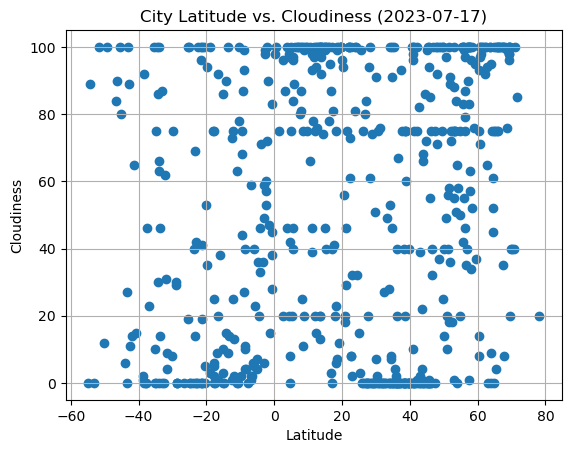

In [27]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'])

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('City Latitude vs. Cloudiness ({})'.format(time.strftime('%Y-%m-%d')))
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

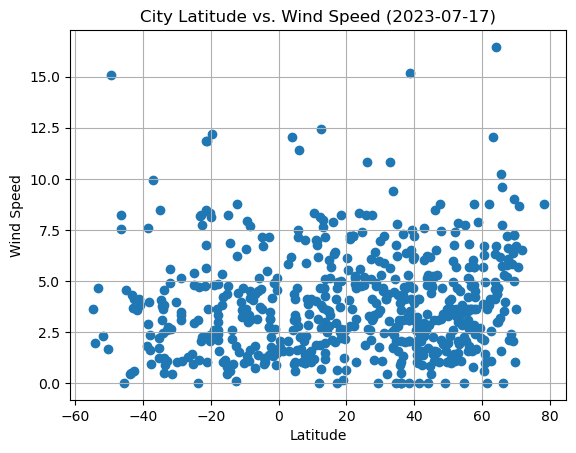

In [29]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'])

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('City Latitude vs. Wind Speed ({})'.format(time.strftime('%Y-%m-%d')))
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [124]:
# Define a function to create Linear Regression plots
def linear_regression_plot(df, x_col, y_col):
    plt.plot(df[x_col], df[y_col], 'o')
    plt.xlabel(x_col)
    plt.ylabel(y_col)
    plt.title('{} vs {}'. format(x_col, y_col))
    
    slope, intercept, r_value, p_value, std_err = linregress(df[x_col], df[y_col])
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    plt.annotate(line_eq, xy=(0.05, 0.90), xycoords='axes fraction', fontsize=15,color="red", 
                 bbox=dict(boxstyle="round", alpha=0.1))
    
    print("the r-value is: {}".format(r_value))
    print(line_eq)
    plt.plot(df[x_col], slope * df[x_col] + intercept,"-r")
    plt.show()

In [32]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] > 0] 
# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,tiksi,71.6872,128.8694,12.92,55,85,6.49,RU,1689583645
1,krasnokholmskiy,55.9873,55.0466,22.47,63,99,4.20,RU,1689583646
3,vorgashor,67.5833,63.9500,16.57,81,100,6.07,RU,1689583646
4,talnakh,69.4865,88.3972,10.67,86,100,5.00,RU,1689583646
6,fangshan,39.6983,115.9925,38.04,18,0,4.63,CN,1689583647


In [34]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0] 
# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
2,port-aux-francais,-49.3500,70.2167,1.55,95,100,15.10,TF,1689583646
5,waingapu,-9.6567,120.2641,26.44,65,2,6.56,ID,1689583646
7,puerto ayora,-0.7393,-90.3518,24.75,95,45,0.89,EC,1689583647
17,port mathurin,-19.6833,63.4167,23.28,77,35,12.17,MU,1689583649
18,hithadhoo,-0.6000,73.0833,28.22,69,83,1.46,MV,1689583649


###  Temperature vs. Latitude Linear Regression Plot

the r-value is: -0.5182261761696904
y = -0.21x + 32.75


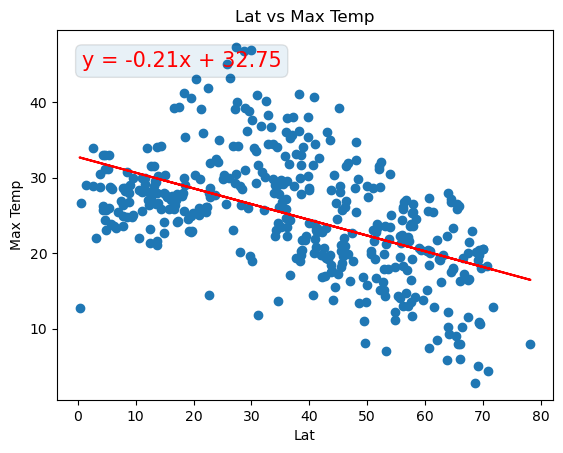

In [125]:
# Linear regression on Northern Hemisphere
linear_regression_plot(northern_hemi_df, 'Lat', 'Max Temp')

the r-value is: 0.8013782682965862
y = 0.5x + 29.19


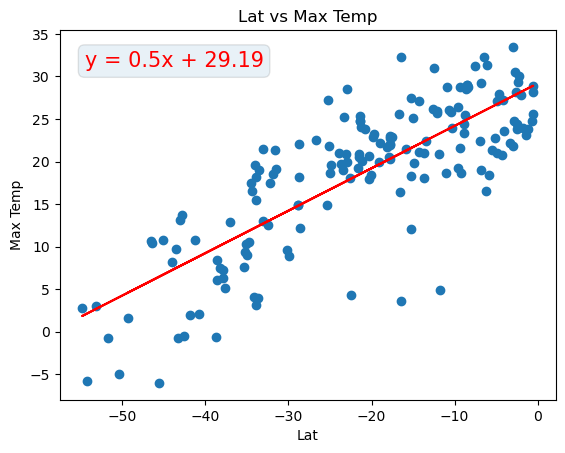

In [126]:
# Linear regression on Southern Hemisphere
linear_regression_plot(southern_hemi_df, 'Lat', 'Max Temp')

**Discussion about the linear relationship:**

There is a significant correlation between temperature and latitude. The temperature is higher as it approaches zero which is the equator. the temperature decreases as you get closer to the poles.

### Humidity vs. Latitude Linear Regression Plot

the r-value is: -0.1051749366214243
y = -0.14x + 69.78


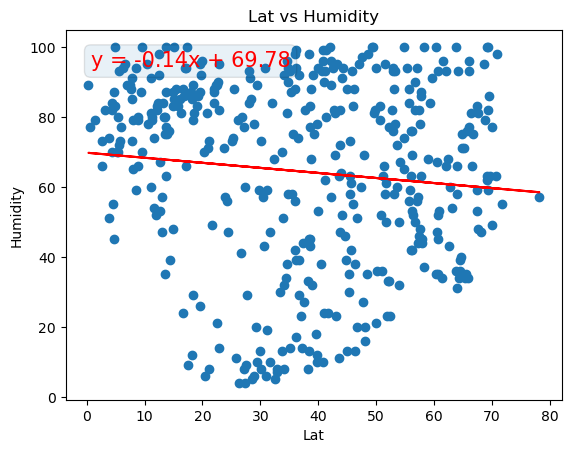

In [127]:
# Northern Hemisphere
linear_regression_plot(northern_hemi_df, 'Lat', 'Humidity')

the r-value is: -0.14105193277981343
y = -0.22x + 62.19


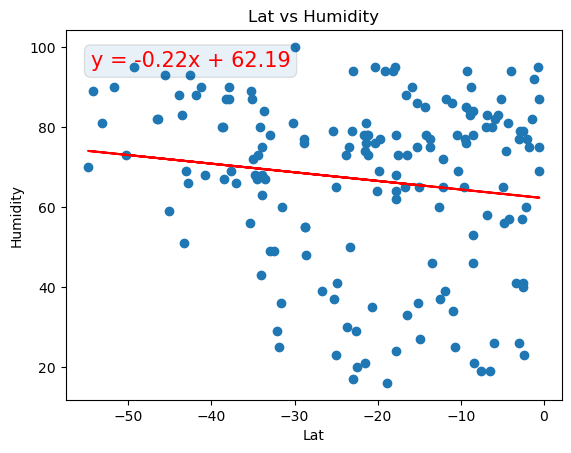

In [128]:
# Southern Hemisphere
linear_regression_plot(southern_hemi_df, 'Lat', 'Humidity')

**Discussion about the linear relationship:** 

There is a slight correlation between humidity and latitude. Apparently the southern hemispheres tend to have higher humidity than the northern hemisphere.

### Cloudiness vs. Latitude Linear Regression Plot

the r-value is: 0.018204986567381596
y = 0.04x + 54.35


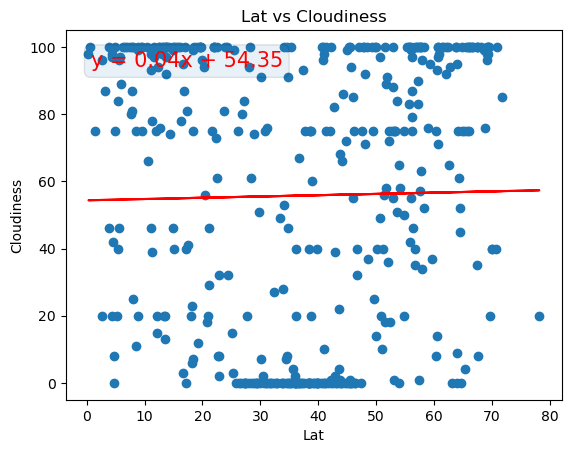

In [129]:
# Northern Hemisphere
linear_regression_plot(northern_hemi_df, 'Lat', 'Cloudiness')

the r-value is: -0.015556034843513023
y = -0.04x + 37.81


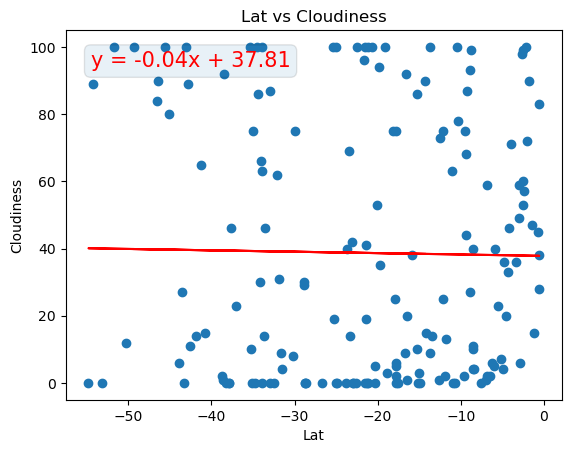

In [130]:
# Southern Hemisphere
linear_regression_plot(southern_hemi_df, 'Lat', 'Cloudiness')

**Discussion about the linear relationship:** 

The correlations seem to be very insignificant. Which indicates that latitude does not influence wind speed

### Wind Speed vs. Latitude Linear Regression Plot

the r-value is: 0.08016692959455021
y = 0.01x + 3.59


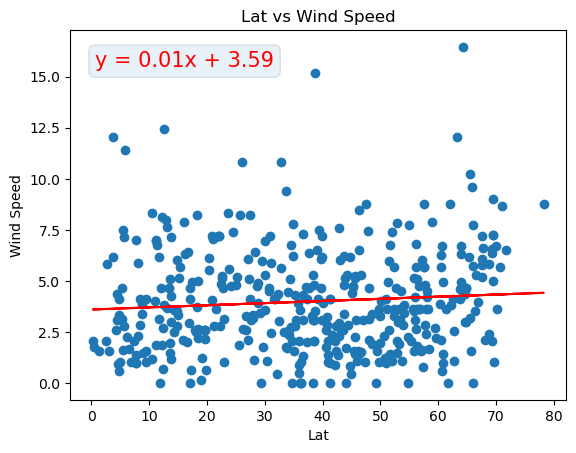

In [131]:
# Northern Hemisphere
linear_regression_plot(northern_hemi_df, 'Lat', 'Wind Speed')

the r-value is: -0.030888485737673645
y = -0.01x + 3.54


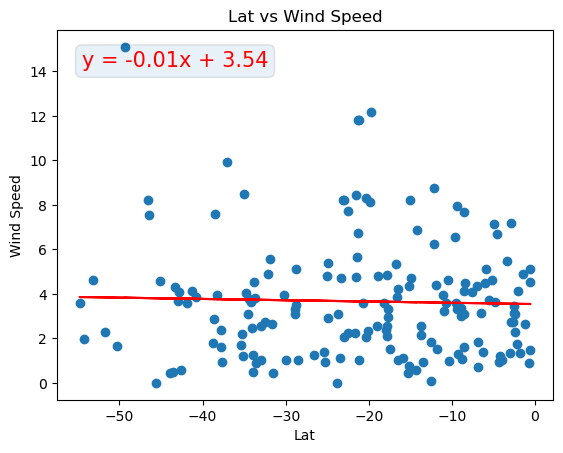

In [132]:
# Southern Hemisphere
linear_regression_plot(southern_hemi_df, 'Lat', 'Wind Speed')

**Discussion about the linear relationship:** 

* the strongest correlation is between temperature and longitude at southern hemisphere, but that increment continues upto thirty northern latitude
* the wind speed and cloudiness correlations are small and nothing significantly  
* although there is a slight between latitude and humidity, the dispersion is significant and the correlations barely perceptible
